In [1]:
import pandas_gbq as pbq
import pandas as pd
import warnings
import numpy as np
from datetime import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import json
import base64
from pathlib import Path
import warnings

from appscript import app, k
from mactypes import Alias
from pathlib import Path


font_style = 'Consolas'
    
mpl.rcParams['font.family'] = font_style
mpl.rcParams["font.weight"] = "bold"
mpl.rcParams["axes.labelweight"] = "bold"
mpl.rcParams["axes.titleweight"] = "bold"

try:
    plt.style.use(r'C:\Users\KamilcS\OneDrive - Universal Music Group\projects\matplotlibrc')
except:
    plt.style.use('/Users/KamilcS/Library/CloudStorage/OneDrive-UniversalMusicGroup/projects/matplotlibrc')

warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

palette = json.loads(open("../palette.json").read())
report_date = datetime.now().strftime('%Y-%m-%d')

In [2]:
album_dict = json.loads(open('/Users/KamilcS/Library/CloudStorage/OneDrive-UniversalMusicGroup/projects/ALBUM_DATA.json').read())
# for k,v in album_dict.items():
#     print(k)
#     print('\t', tuple(v['track_list']))


In [34]:
def pull_down_data(albums_dict, year):
    query = open('./queries/w1_album_consumption_tracks_list.sql').read()

    dfs_list = []

    for k,v in albums_dict.items():
        master_album = k
        r2_project_number = v['r2_project_number']
        tracks_list = tuple(v['track_list'])

        query_formatted = query.format(
            r2_project_number= r2_project_number,
            tracks_list = tracks_list,
            start_date = f'{year}-10-01',
            end_date = f'{year}-12-31'
        )

        print(f'pulling: {master_album}\t {year}')

        df = pbq.read_gbq(query_formatted, project_id='umg-us')
        df['transaction_date'] = pd.to_datetime(df['transaction_date'])
        df['master_album'] = master_album
        dfs_list.append(df)

    
    # AFTER LOOP IS DONE, DO BELOW

    df = pd.concat(dfs_list)

    df['album_adjusted_units'] = np.where(
        df['usage_group'].str.contains('Streaming (Premium)', regex=False), df['units'].div(1250), 
            np.where(df['usage_group'].str.contains('Streaming (Free)', regex=False), df['units'].div(3750),
                np.where(
                    df['product_type'].str.contains('Video', regex=False), df['units'].div(3750),
                        np.where(
                            df['usage_group'].str.contains('Download (Track)', regex=False), df['units'].div(10), df['units']
                        )
                    )
                )
            )

    df['raw_stream_units'] = np.where(
        df['usage_group'].str.contains('Streaming', regex=False), df['units'], 0
    )


    df['product_type'] = np.where(
        df['product_type'] == 'Track', 'Audio', df['product_type']

    )

    df = df[(df.units != 0) & (df.account != 'recochoku')]

    df['year'] = df['transaction_date'].dt.year
    df['month'] = df['transaction_date'].dt.month
    df['day'] = df['transaction_date'].dt.day
    df['month_day'] = df['transaction_date'].dt.strftime('%b-%d')
    

    # FIX FOR AMY GRANT ALBUM, STRAND APOSTROPHES
    df['master_track'] = df['master_track'].str.replace("’", "'")


    return df






### KEEP FOR GENRATING
######################
years_list = [2019, 2020, 2021, 2022]
df = pd.concat([pull_down_data(album_dict['Amy Grant'], year) for year in years_list])
df.to_pickle('./data/amy_grant_christmas_albums.pkl')
######################
### KEEP FOR GENRATING





df = pd.read_pickle('./data/amy_grant_christmas_albums.pkl')



# df = df[(df.units != 0) & (df.account != 'recochoku')]
# _2019 = pd.date_range('2019-10-01', '2019-12-31').to_series()
# _2020 = pd.date_range('2020-10-01', '2020-12-31').to_series()
# _2021 = pd.date_range('2021-10-01', '2021-12-31').to_series()
# _2022 = pd.date_range('2022-10-01', '2022-12-31').to_series()
# reindex_dates = pd.concat([_2019, _2020, _2021, _2022])

pulling: A Christmas Album	 2019


Downloading: 100%|██████████| 16473/16473 [00:01<00:00, 10504.30rows/s]


pulling: Home For Christmas	 2019


Downloading: 100%|██████████| 18263/18263 [00:01<00:00, 12185.25rows/s]


pulling: Christmas To Remember	 2019


Downloading: 100%|██████████| 15679/15679 [00:01<00:00, 10309.40rows/s]


pulling: Tennessee Christmas	 2019


Downloading: 100%|██████████| 19550/19550 [00:01<00:00, 11776.92rows/s]


pulling: A Christmas Album	 2020


Downloading: 100%|██████████| 15579/15579 [00:01<00:00, 9857.09rows/s]


pulling: Home For Christmas	 2020


Downloading: 100%|██████████| 16863/16863 [00:01<00:00, 9844.60rows/s]


pulling: Christmas To Remember	 2020


Downloading: 100%|██████████| 14553/14553 [00:01<00:00, 9255.24rows/s]


pulling: Tennessee Christmas	 2020


Downloading: 100%|██████████| 20451/20451 [00:01<00:00, 10862.28rows/s]


pulling: A Christmas Album	 2021


Downloading: 100%|██████████| 17433/17433 [00:01<00:00, 11531.68rows/s]


pulling: Home For Christmas	 2021


Downloading: 100%|██████████| 20204/20204 [00:01<00:00, 12662.78rows/s]


pulling: Christmas To Remember	 2021


Downloading: 100%|██████████| 16162/16162 [00:01<00:00, 13489.07rows/s]


pulling: Tennessee Christmas	 2021


Downloading: 100%|██████████| 22549/22549 [00:01<00:00, 13611.75rows/s]


pulling: A Christmas Album	 2022


Downloading: 100%|██████████| 18066/18066 [00:01<00:00, 10319.13rows/s]


pulling: Home For Christmas	 2022


Downloading: 100%|██████████| 19506/19506 [00:01<00:00, 10548.33rows/s]


pulling: Christmas To Remember	 2022


Downloading: 100%|██████████| 16079/16079 [00:01<00:00, 10416.75rows/s]


pulling: Tennessee Christmas	 2022


Downloading: 100%|██████████| 20627/20627 [00:01<00:00, 13742.66rows/s]


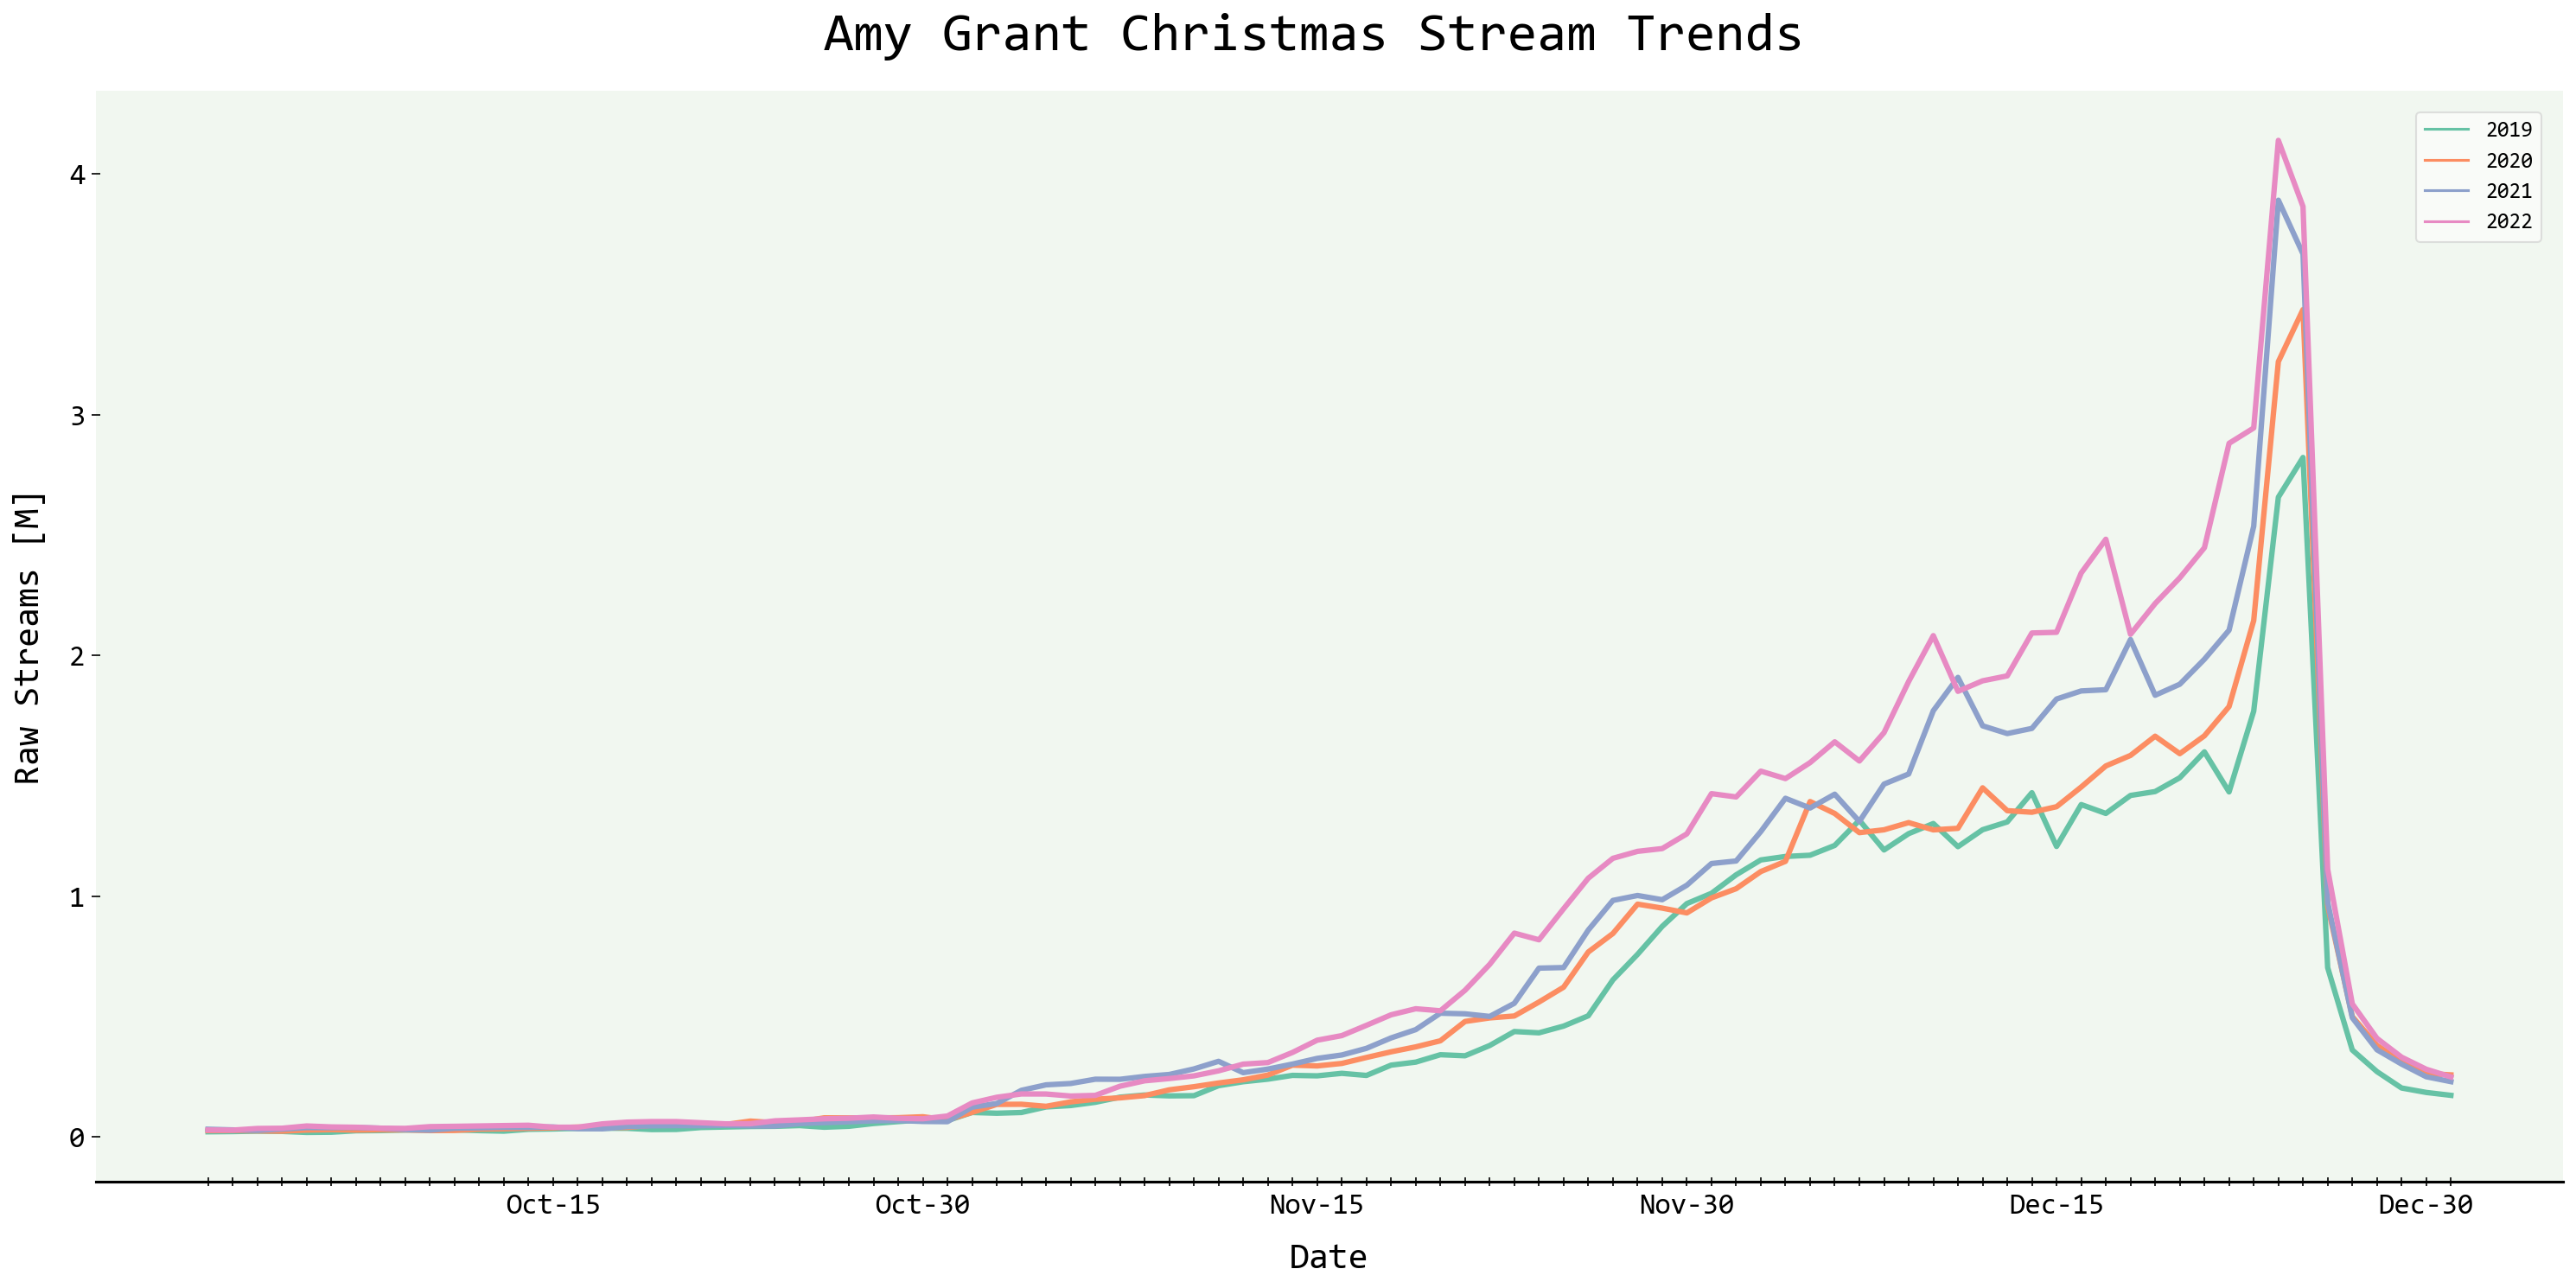

In [107]:

def plot_executive(df):
    fig, ax = plt.subplots(nrows=1,ncols=1,figsize = (20,10), dpi=150)
    title_string = f'{df.master_artist.unique()[0]} Christmas Stream Trends'
    out_path_image = './outputs/' + title_string.lower().replace(' ', '_') + '.png'
    out_path_html = out_path_image.replace('.png', '.html')

    df = df.groupby(['transaction_date', 'month_day']).raw_stream_units.sum().reset_index().sort_values('transaction_date')

    # total = '{:,}'.format(df.raw_stream_units.sum())

    sns.lineplot(
        data=df, 
        ax=ax,
        x=df['month_day'],
        y=df['raw_stream_units'].div(1000000),
        hue=df["transaction_date"].dt.year,
        ci=None,
        palette=list(sns.color_palette("Set2"))[:4],
        lw=3
    ).set(
        xlabel = 'Date',
        ylabel = 'Raw Streams [M]',
    )


    
    

    sns.despine(left=True)

    fig.suptitle(title_string, size = 30, weight="bold", y=0.99, x=0.51)
    plt.tight_layout(pad=1.2)
    ax.set_facecolor('#f1f7f0')
    ax.legend(borderaxespad=1, title='')
    plt.tick_params(axis='both', which='major', labelsize=16)

    # Remove Clustered Axis Labels
    for label in ax.xaxis.get_ticklabels():
        if not ("15" in label.get_text() or  "30" in label.get_text()):
            label.set_visible(False)

    fig.savefig(out_path_image)
    handles, labels = plt.gca().get_legend_handles_labels()
    return out_path_image, out_path_html, title_string

out_path_image_1, out_path_html, title_string = plot_executive(df)

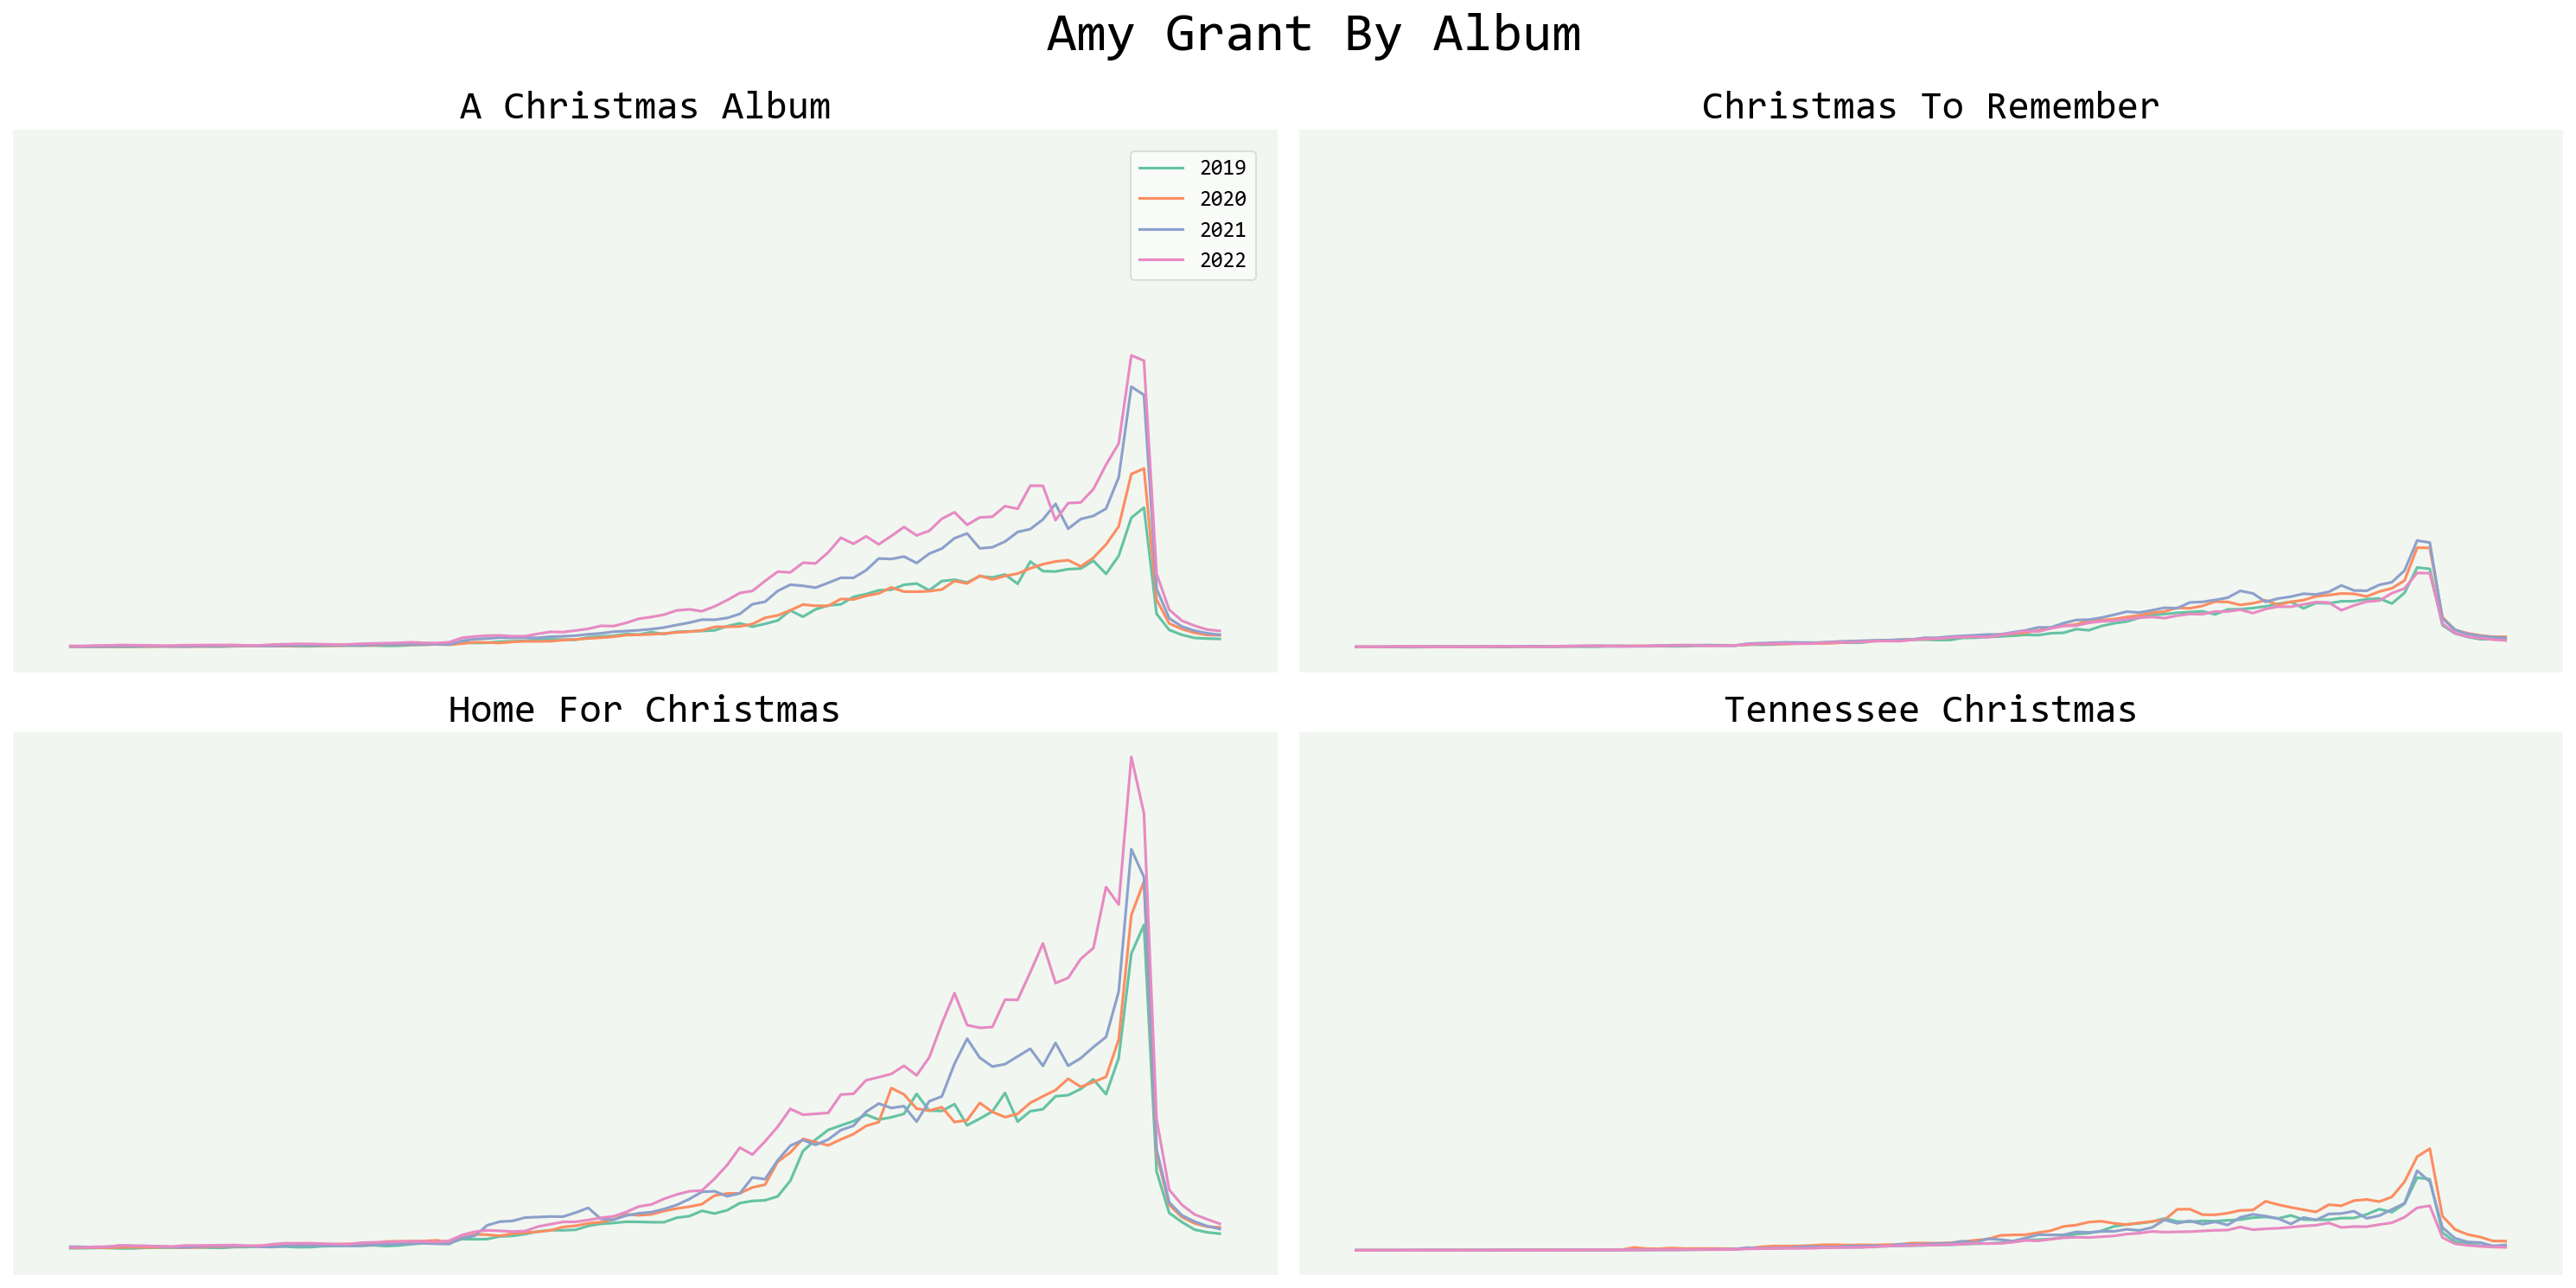

In [109]:
def plot_albums(df):

    albums = df.master_album.unique()
    album_count = len(albums)

    fig, axes = plt.subplots(nrows=2,ncols=2,figsize = (20,10), dpi=150, sharex=True, sharey=True)

    title_string = f'Amy Grant By Album'
    out_path_image_1 = './outputs/' + title_string.lower().replace(' ', '_') + '.png'

    album_groups = df.groupby('master_album')
    group_keys = list(album_groups.groups.keys())

    for i, (ax, grp_name ) in enumerate(list(zip(axes.flatten(), group_keys))):
        df_grp = album_groups.get_group(grp_name)
        df_grp = df_grp.groupby(['transaction_date', 'month_day']).raw_stream_units.sum().reset_index().sort_values('transaction_date')




        sns.lineplot(
            data=df_grp, 
            ax=ax,
            x=df_grp['month_day'],
            y=df_grp['raw_stream_units'].div(1000000),
            hue=df_grp["transaction_date"].dt.year,
            ci=None,
            # palette=list(sns.color_palette("Set2"))[::-1][:4]
            palette = list(sns.color_palette("Set2"))[:4]
        ).set(
            xlabel = None,
            ylabel = None,
            title = grp_name,
            
        )

        ax.legend(borderaxespad=1, title='')
        if i != 0:
            ax.get_legend().remove()
        

        


        # Remove Clustered Axis Labels
        for label in ax.xaxis.get_ticklabels():
            if not ("15" in label.get_text() or  "30" in label.get_text()):
                label.set_visible(False)
            else:
                print(label.get_text())

        ax.set_facecolor('#f1f7f0')
        

        ax.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)

    sns.despine(left=True, bottom=True)
    fig.suptitle(title_string, size = 30, weight="bold", y=0.99, x=0.51)
    plt.tight_layout(pad=1.2)
    fig.savefig(out_path_image_1)

    return out_path_image_1, title_string

out_path_image_1, title_string = plot_albums(df)

# plot_albums(df)

In [33]:
def raw_stream_units_table(df):
    df = df[df['usage_group'].str.contains('Streaming')]

    df = df.pivot_table(index='master_album', columns=['product_type', 'account'], values='raw_stream_units', aggfunc='sum')


    df['TOTAL'] = df.sum(1)





    return df.sort_values('TOTAL').fillna(0).astype(int)


raw_stream_units_table(df)

product_type              Audio                                               \
account                  amazon     apple deezer  google  kugou kuwo netease   
master_album                                                                   
Tennessee Christmas     8632662   2847753  60566   39423   1375  204    8872   
Christmas To Remember   2026383   3350261  33428   72905    110  370    2182   
A Christmas Album       5652568  12013958  68268  439557     90   77    5966   
Home For Christmas     36930560  15747744  98253  510331  35073  581  435105   

product_type                                                        Video  \
account                 pandora     qq rhapsody   spotify  youtube amazon   
master_album                                                                
Tennessee Christmas     2502426   6963    23694   5538835   100865      0   
Christmas To Remember  16068208   1426    67001   8107331   134609      0   
A Christmas Album      22438543   6906   113599  18731828  3788211      0   
Home For Christmas     37801388  56994   159901  25035963  1700169      2   

product_type                                       TOTAL  
account               apple     vevo  youtube             
master_album                                              
Tennessee Christmas    4258  2549441   344411   22661748  
Christmas To Remember   799   431694   314129   30610836  
A Christmas Album      1912   833250  1298466   65393199  
Home For Christmas     2411  2339305  2095052  122948832

In [320]:
## TABLE 1 (RAW STREAM)
def raw_stream_units_table(df):
    df = df[df['usage_group'].str.contains('Streaming')]
    df_list = []
    sub_totals = []
    album_groups = df.groupby(['master_album'])
    for grp in album_groups.groups.keys():

        df1 = album_groups.get_group(grp)
        df2 = df1.pivot_table(index=['master_album', 'master_track'], columns=['account'], values='raw_stream_units', aggfunc='sum')
        df2['TOTAL'] = df2.sum(1)
        df2 = df2.sort_values(['master_album', 'TOTAL'], ascending=False, axis=0)
        grp_subtotal = df2.sum()
        df2.loc[(grp, f'SUB TOTAL'), :] = grp_subtotal
        df_list.append(df2)
        sub_totals.append(grp_subtotal)

    final_df = pd.concat(df_list, axis=0).fillna(0)
    final_df.loc[('ALL ALBUM', 'GRAND TOTAL'), :] = sum(sub_totals)
    reset_df = final_df.reset_index()
    return final_df.astype(int), reset_df[reset_df['master_track'].str.contains('TOTAL')].index



## TABLE 2 (TRACK DOWNLOADS)
def track_download_table(df):
    df = df[df['usage_group'].str.contains('Track')]
    df_list = []
    sub_totals = []
    # total_indexes = []
    album_groups = df.groupby(['master_album'])
    for grp in album_groups.groups.keys():

        df1 = album_groups.get_group(grp)
        df2 = df1.pivot_table(index=['master_album', 'master_track'], columns=['account'], values='units', aggfunc='sum')
        # display(df2.head())
        df2['TOTAL'] = df2.sum(1)
        df2 = df2.sort_values(['master_album', 'TOTAL'], ascending=False, axis=0)
        grp_subtotal = df2.sum()
        df2.loc[(grp, f'SUB TOTAL'), :] = grp_subtotal
        # display(df2.head())
        df_list.append(df2)
        sub_totals.append(grp_subtotal)

    final_df = pd.concat(df_list, axis=0).fillna(0)
    final_df.loc[('ALL ALBUM', 'GRAND TOTAL'), :] = sum(sub_totals)
    reset_df = final_df.reset_index()

    return final_df.fillna(0).astype(int), reset_df[reset_df['master_track'].str.contains('TOTAL')].index

## TABLE 3 (TOTAL CONSUMPTION)
def total_consumption_table(df):
    # df2 = df1.pivot_table(index=['master_album', 'master_track'], columns=['account'], values='units', aggfunc='sum')
    df1 = df.pivot_table(index=['master_album'], values='album_adjusted_units', aggfunc='sum')

    df1 = df1.sort_values('album_adjusted_units', ascending=False)
    df1.loc['GRAND TOTAL', :] = df1.sum(0)

    print(df1.shape)

    return df1.astype(int)

df_raw_streams, df_raw_streams_indexes = raw_stream_units_table(df)

df_track_downloads, df_track_downloads_indexes = track_download_table(df)

df_total_consumption = total_consumption_table(df)

(5, 1)


In [323]:
data_uri = base64.b64encode(open(str(out_path_image), 'rb').read()).decode('utf-8')
img_tag = '<img style="margin-top: 80px;" src="data:image/png;base64,{0}">'.format(data_uri)

html_string = '''
<html>
<head>
<meta name="viewport" content="width=device-width, initial-scale=0.5" /> 
<style> 
  #centered {{clear:both; margin: auto; zoom: 75%;}}
  html {{font-family:consolas; margin: auto; margin-bottom: 100px; margin-bottom: 100px;}}
  png {{margin-top: 80px;}}
  tables1, tables2, tables3 {{ display: inline-block; padding: 20px; border-collapse: collapse; margin: 0;}}

  h2 {{ font-size: 30pt; text-align:left;}}
  thead {{
    font-size: 20pt;text-align:center; vertical-align: center;padding: 10px; border-bottom:1px solid black; color: black; background-color: #fafaf0; margin: 0;
    }}
  th {{
    font-size: 18pt; text-align:center; vertical-align: center;padding: 10px; border-bottom:1px solid black; color: black; background-color: #f1f7f0; 
    padding-left: 100px;margin: 0;
    }}
  td {{
    font-size: 15pt;text-align:right; vertical-align: center; padding: 10px; border-bottom:1px solid black; background-color: white;
    padding-left: 100px;margin: 0;
    }}

    .blank, level0, level1 {{background-color: #ffffff;}}
    

    .level0, row0 {{background-color: #cee0cc}}
    {borders}


    
</style>
</head>
  <body id="centered">
    <center><png>{image}</png></center>
  <hr>  
  <center>
    <tables1 style="margin-top: 20px;">
    <center><h2>Raw Streams</h2></center>
    <center>{table1}</center>
    </tables1>
    <tables2 style="margin-top: 20px;">
    <center><h2>Track Downloads</h2></center>
    <center>{table2}</center>
    </tables2>

    <tables3 style="margin-top: 20px;">
    <center><h2>Total Consumption</h2></center>
    <center>{table3}</center>
    </tables3>

  </center>
  </body>
</html>
'''.format(
        image=img_tag,
        table1=df_raw_streams.style.format(precision=0, na_rep=0, thousands=",").to_html(),
        table2=df_track_downloads.style.format(precision=0, na_rep=0, thousands=",").to_html(),
        table3=df_total_consumption.style.format(precision=0, na_rep=0, thousands=",").to_html(),

        borders = ''.join(
            '.row{i} {{ border-bottom: 3px solid #455943;}}\n'.format(i=num) for num in df_raw_streams_indexes

            )
        )




with open(out_path_html, 'w') as f:
    f.write(html_string)

In [282]:
from appscript import app, k
from mactypes import Alias
from pathlib import Path

def create_message_with_attachment():
    subject = f'{title_string}'
    body = f'<br>\n{html_string}' \
        .replace('padding-left: 100px', 'padding-left: 20px') \
        .replace('font-size: 18pt', 'font-size: 12pt') \
        .replace('font-size: 16pt', 'font-size: 10pt') \
        .replace('padding: 10px', 'padding: 2px') \
        .replace('<hr>', '') \
        .replace('<center>', '') \
        .replace('</center>', '') \
        .replace('font-size: 30pt;', 'font-size: 20pt;') 
    to_recip = []

    msg = Message(subject=subject, body=body, to_recip=to_recip, cc_recip=['david.sylvester@umusic.com'])

    # attach file
    p = str(out_path_html)
    msg.add_attachment(p)

    msg.show()

class Outlook(object):
    def __init__(self):
        self.client = app('Microsoft Outlook')

class Message(object):
    def __init__(self, parent=None, subject='', body='', to_recip=[], cc_recip=[], show_=True):

        if parent is None: parent = Outlook()
        client = parent.client

        self.msg = client.make(
            new=k.outgoing_message,
            with_properties={k.subject: subject, k.content: body})

        self.add_recipients(emails=to_recip, type_='to')
        self.add_recipients(emails=cc_recip, type_='cc')

        if show_: self.show()

    def show(self):
        self.msg.open()
        self.msg.activate()

    def add_attachment(self, p):
        # p is a Path() obj, could also pass string

        p = Alias(str(p)) # convert string/path obj to POSIX/mactypes path

        attach = self.msg.make(new=k.attachment, with_properties={k.file: p})

    def add_recipients(self, emails, type_='to'):
        if not isinstance(emails, list): emails = [emails]
        for email in emails:
            self.add_recipient(email=email, type_=type_)

    def add_recipient(self, email, type_='to'):
        msg = self.msg

        if type_ == 'to':
            recipient = k.to_recipient
        elif type_ == 'cc':
            recipient = k.cc_recipient

        msg.make(new=recipient, with_properties={k.email_address: {k.address: email}})

In [324]:
create_message_with_attachment()